In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Checking null values for data cleaning

In [6]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Checking duplicates for data cleaning**

In [9]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool


In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**Checking correlation between the features**

In [12]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


**Negative values are darker and positive vaules are lighter** 

<AxesSubplot:>

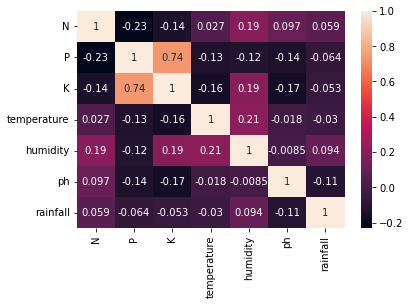

In [13]:
sns.heatmap(df.corr(),annot=True)

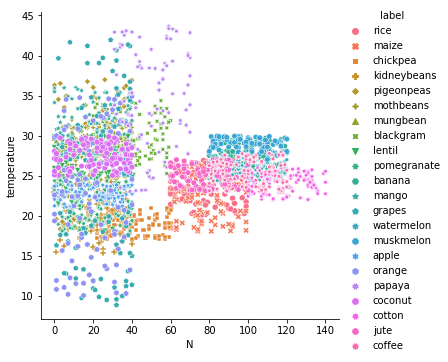

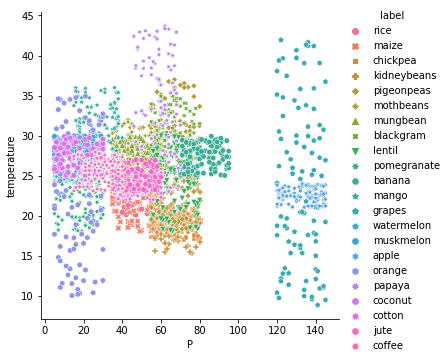

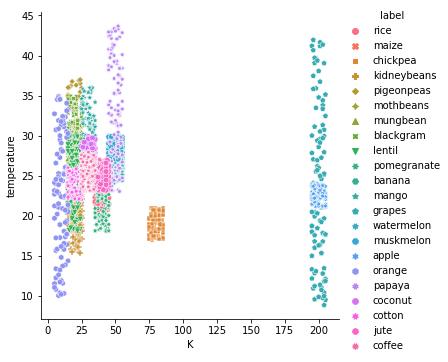

In [14]:
sns.relplot(x='N',y='temperature',data=df, hue='label',style='label')
sns.relplot(x='P',y='temperature',data=df, hue='label',style='label')
sns.relplot(x='K',y='temperature',data=df, hue='label',style='label')

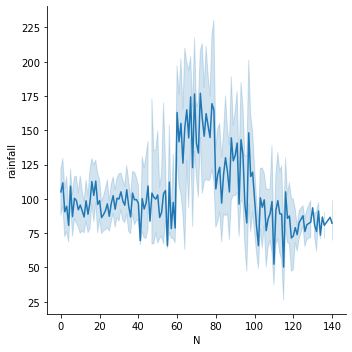

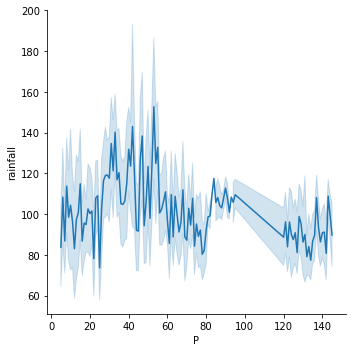

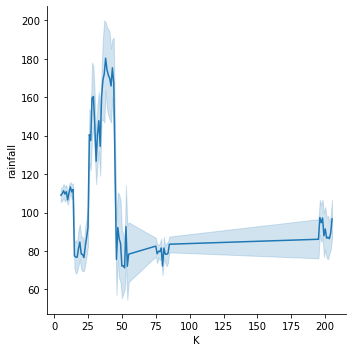

In [15]:
sns.relplot(x='N',y='rainfall',data=df, kind='line')
sns.relplot(x='P',y='rainfall',data=df, kind='line')
sns.relplot(x='K',y='rainfall',data=df, kind='line')

# Data Pre-processing

In [16]:
df['label'] = df.label.astype('category').cat.codes
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label             int8
dtype: object


In [17]:
from sklearn.model_selection import train_test_split

train=df.drop(['P','K','N'], axis=1)
test=df['P']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2, random_state=5)

In [19]:
X_train.head()

,temperature,humidity,ph,rainfall,label
621,28.742010,85.816759,6.452006,48.545986,14
2098,24.447439,82.286484,6.769346,190.968489,8
1229,39.065555,82.038130,6.000574,69.307729,7
1418,29.095883,94.167484,6.159051,26.705813,15
1880,28.297476,95.411228,6.141502,182.448235,4


In [20]:
X_train.shape, X_test.shape

((1760, 5), (440, 5))

In [21]:
from sklearn.preprocessing import StandardScaler
#fit the scaler to the train set for learning the parameters
scaler = StandardScaler().fit(X_train)

#Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
scaler.mean_

array([ 25.5826747 ,  71.37496471,   6.46684319, 104.33498292,
        10.44488636])

In [23]:
scaler.scale_

array([ 5.11040598, 22.37203301,  0.7712747 , 55.53541608,  6.32125985])

In [24]:
X_test_scaled

array([[-1.54920968,  0.51645148, -0.19935515, -0.62064641, -0.54496832],
       [ 0.6829161 ,  0.91812698, -0.16264279, -1.35948021,  0.72060218],
       [ 0.26256633,  0.88619999, -1.16184001,  1.63080133, -1.01955726],
       ...,
       [ 0.3846183 , -0.37963348, -0.44477944,  1.38798093, -0.86136095],
       [ 0.05238237,  0.47294942, -0.87333725,  0.2656077 , -1.4941462 ],
       [-0.17372357, -0.50993455, -0.78704743, -0.22286785,  1.19519112]])

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [26]:
np.round(X_train_scaled.describe(),2)

,temperature,humidity,ph,rainfall,label
count,1760.00,1760.00,1760.00,1760.00,1760.00
mean,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-3.28,-2.55,-3.84,-1.51,-1.65
25%,-0.55,-0.49,-0.65,-0.71,-0.86
50%,-0.00,0.41,-0.05,-0.16,-0.07
75%,0.58,0.82,0.60,0.40,0.88
max,3.54,1.28,4.50,3.50,1.67


# LinearRegression Model

In [27]:
from sklearn.linear_model import LinearRegression

model_scaled= LinearRegression().fit(X_train_scaled, y_train)

In [28]:
print('model coefficients are', model_scaled.coef_)
print('model intercept is', model_scaled.intercept_)
print('model score is', model_scaled.score(X_train_scaled,y_train))

model coefficients are [ -2.44712564  -0.19316667  -5.026821    -1.82863115 -15.61045569]
model intercept is 53.54602272727273
model score is 0.2706677028603278


In [29]:
y_pred_scaled= model_scaled.predict(X_test_scaled)

In [30]:
y_pred_scaled

array([67.88163209, 43.75212533, 71.50628667, 68.43036582, 26.12161955,
       26.22199655, 35.0278738 , 39.53152063, 47.39251942, 83.65904979,
       70.71163855, 28.69403742, 34.84667926, 57.8036519 , 65.44389536,
       70.61625489, 67.40337965, 41.71575616, 37.7185706 , 37.1299576 ,
       45.14524697, 65.38164845, 63.80189204, 28.85033301, 66.26268338,
       58.07917365, 39.44534761, 29.41491826, 35.29101848, 32.50247831,
       85.31045116, 30.94763306, 54.34460404, 52.1494665 , 80.06014252,
       62.46506735, 30.66587955, 40.68619425, 61.98606734, 63.22735212,
       54.76539416, 74.96112829, 52.72985224, 32.90867284, 81.00828523,
       73.08466096, 66.53787378, 33.67564401, 42.47441566, 59.10386089,
       61.14305874, 38.84621047, 40.77486361, 43.71531584, 59.76302978,
       37.2893075 , 44.62828178, 23.50750307, 42.10426343, 31.49993073,
       56.75829161, 68.7267116 , 77.1490818 , 69.2747244 , 44.83307374,
       40.68922613, 73.39047828, 30.39973647, 65.54977091, 78.81

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
print('mean squared error is', np.round(mean_squared_error(y_pred_scaled, y_test)))
print('r squared error is', np.abs(r2_score(y_pred_scaled, y_test)))

mean squared error is 841.0
r squared error is 1.99351805929361


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lgr= LogisticRegression(max_iter=1000)

lgr.fit(X_train, y_train)

C:\Users\maruf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [33]:
prediction_test = lgr.predict(X_test)

In [34]:
print("Accuracy=", metrics.accuracy_score(y_test,prediction_test))

Accuracy= 0.04090909090909091


In [35]:
print(lgr.coef_)

[[-7.77662733e-02  7.24323820e-02 -9.07376279e-01  5.16082698e-03
   3.50379954e-01]
 [-4.76507826e-02  6.61668680e-02 -8.31631797e-01  1.07873346e-02
   3.03497424e-01]
 [-4.53754602e-02  1.92374595e-02 -4.39924905e-01  7.75804259e-03
   4.40978591e-01]
 [-1.36133100e-01  5.42050071e-02 -3.84024622e-01  1.38843550e-02
   3.17855605e-01]
 [-1.02851083e-01  5.04803934e-02 -5.98116557e-01  9.17641029e-03
   3.66206658e-01]
 [-4.46380715e-02  3.58605055e-02 -7.60068683e-01  1.40955459e-02
   3.78617622e-01]
 [-9.85537027e-02  7.48911192e-02 -7.03993719e-01  9.06538343e-03
   2.77156112e-01]
 [-9.32250742e-02  1.06321416e-01 -1.19079589e+00  4.30168124e-03
   3.13081966e-01]
 [-1.01111006e-01  6.83549416e-02 -5.92307136e-01  1.28338998e-03
   3.02267191e-01]
 [-1.48374719e-01  8.30096758e-02 -8.43197303e-01  1.21781231e-02
   3.31395293e-01]
 [-1.35377166e-02 -8.65073313e-03 -1.48910377e-01  1.95711687e-02
   2.69866810e-01]
 [-7.25110045e-03 -5.80092487e-02  1.34087878e-01  1.04517285e-02

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

In [37]:
gnb.fit(X_train,y_train)

GaussianNB()

In [38]:
y_pred2=gnb.predict(X_test)

In [39]:
print(y_pred2)

[132   6   6  79   7   8   7  25  60 143   6  13   7  38  60  79 133   7
  45   7   6  79  33   7  76  39   8   7  46   8 143  51  40  40  92  45
  14   7  72  62  31  79  48   7  88  79   6   8  14  45  33  45  55  14
  51   7   6  59   7  45  41  78  79 132   7   7  79   6  15  85  53  60
   7  25  94  80   7 143 130  79  79  88 137  38 143   6  81  79  53   7
  55  13  31  33   6   8  55   7  33 130  47  15  39  41  60  76   7  55
  59  18  55  31  31  25  39  62  55   7 143  78   6   6  39  35  31  33
  39  75  33  35  62  38   6  33  13  30  48  78  38 143  11  45 143   8
   6   8  76   8  45  48 132  94  48  46  60  33  48  45   7  40  45 143
  53   7   7   8  39  78  55  60   6 132  38  31  69  78   7   7  38  78
  25 134  13  33 143  15   7   7  78  10  33  79 143   7  14 139  18   7
 123  88   7  39  62 127  53  45  32   6  38   7  45  45  78  39   6   7
  41  38  78   7  14 143  14  33 143  78  47   7   7   7   7  66   7  46
  39   7  45   6  78  60  45   8 143  39  33  40  1

In [40]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred2))

0.04090909090909091


# Neural Network

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


nn= MLPClassifier(activation="logistic",max_iter=300)

nn.fit(X_train, y_train)

C:\Users\maruf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=300)

In [42]:
prediction3 = nn.predict(X_test)

score = accuracy_score(y_test, prediction3)

print(score)

0.038636363636363635
